In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import librosa
import matplotlib.pyplot as plt
import librosa
import numpy as np
from f0_analysis_utils import *

In [86]:
# this file is a perfect continuous segment
file = "samples/audio/ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_3_8s.wav"
y, sr = librosa.load(file, sr=None)
f0, _, _ = librosa.pyin(
    y,
    fmin=librosa.note_to_hz("C2"),
    fmax=librosa.note_to_hz("G6"),
    sr=sr,
    center=False,
)
times = librosa.times_like(f0, sr=sr, hop_length=512, n_fft=2048)
# convert F0 sequence to MIDI note sequence
notes = librosa.hz_to_midi(f0)

In [88]:
segments = get_continous_f0_segments(notes) # this specific file has only one segment
segment = segments[0]
valid_note_events = get_note_events_from_f0_segment(notes, segment, dur_thres=80)
note_events = get_note_events_from_f0_segment(notes, segment, dur_thres=0)

Text(0, 0.5, 'MIDI note numbers')

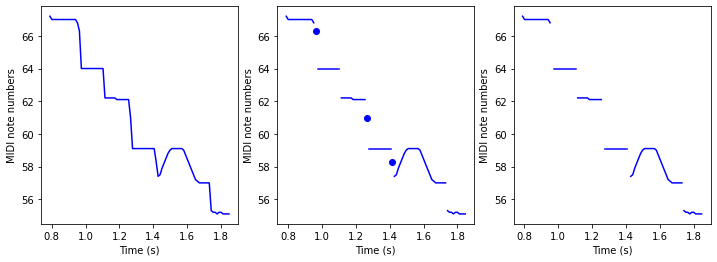

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(times[segment], notes[segment], color='b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("MIDI note numbers")

for note_event in note_events:
    if note_event not in valid_note_events:
        ax2.plot(times[note_event], notes[note_event], color='b', marker='o')
    else:
        ax2.plot(times[note_event], notes[note_event], color='b')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("MIDI note numbers")

for valid_note_event in valid_note_events:
    ax3.plot(times[valid_note_event], notes[valid_note_event], color='b')
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("MIDI note numbers")

Text(0, 0.5, 'Amplitude')

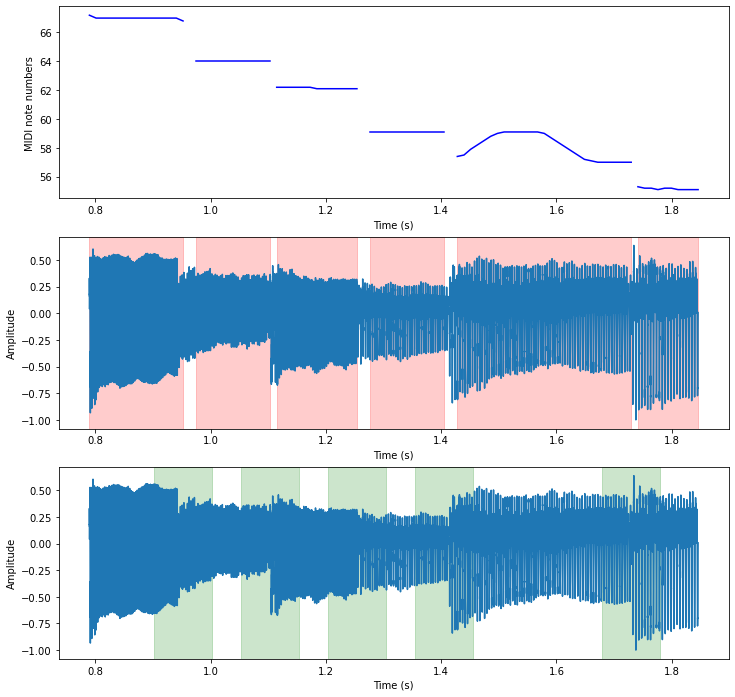

In [90]:
y = y/max(abs(y))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

for valid_note_event in valid_note_events:
    ax1.plot(times[valid_note_event], notes[valid_note_event], color='b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("MIDI note numbers")

start_time = times[valid_note_events[0][0]]
end_time = times[valid_note_events[-1][-1]]
x = librosa.times_like(y, sr=44100, hop_length=1)
ax2.plot(x[int(start_time*sr):int(end_time*sr)], y[int(start_time*sr):int(end_time*sr)])
for valid_note_event in valid_note_events:
    ax2.axvspan(times[valid_note_event][0], times[valid_note_event][-1], color='r', alpha=0.2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

ax3.plot(x[int(start_time*sr):int(end_time*sr)], y[int(start_time*sr):int(end_time*sr)])
for valid_note_event in valid_note_events[:-1]:
    note_event_end = times[valid_note_event][-1]
    transition_start = note_event_end - 0.05
    transition_end = note_event_end + 0.05
    ax3.axvspan(transition_start, transition_end, color='g', alpha=0.2)
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Amplitude")